In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [21]:
blood = pd.read_csv('./blood_pressure.csv')
blood['diet'] = blood['diet'].replace({'0': 'no'})
blood = blood[blood['height'] != 0]
blood = blood[blood['blood_pressure'] != 0]
blood['age_height'] = np.log((blood['age']*blood['height']))
blood['age'] = np.log((blood['age']))
blood['food_agregate'] = (blood['water']*blood['carbs']*blood['fiber']*blood['protien']*blood['sugar'])
blood['drugs'] = (blood['marijuana_use']*blood['cocaine_uses'])
blood['substances'] = (blood['fats']*blood['cholesterol']*blood['alchohol']*blood['caffeine'])
blood[:10].T
blood[:10].T

,0,1,2,3,4,5,6,7,8,9
SEQN,93711.0,93716.0,93717.0,93721.0,93723.0,93726.0,93728.0,93738.0,93743.0,93746.0
blood_pressure,68.0,72.0,62.0,68.0,72.0,52.0,74.0,82.0,86.0,64.0
weight,62.1,77.7,74.4,85.1,64.9,74.3,118.1,97.7,79.3,62.1
height,170.6,159.2,174.1,154.0,170.1,154.5,188.1,170.2,187.8,158.4
bmi,21.3,30.7,24.5,35.9,22.4,31.1,33.4,33.7,22.5,24.8
salt_type,ordinary,ordinary,ordinary,no_extra_salt,ordinary,ordinary,ordinary,salt_substitute,ordinary,ordinary
diet,yes,no,no,no,no,no,no,yes,no,no
protien,101.33,103.91,97.12,79.98,41.62,81.89,80.0,116.36,175.55,80.67
carbs,339.6,442.98,345.52,226.61,269.6,184.99,213.19,50.95,684.76,222.26
sugar,148.21,133.24,137.01,105.06,147.49,72.17,95.17,11.92,170.03,86.64


In [26]:
blood2 = blood[['blood_pressure','age_height', 'cocaine_uses', 'gender' ,'race']].copy()

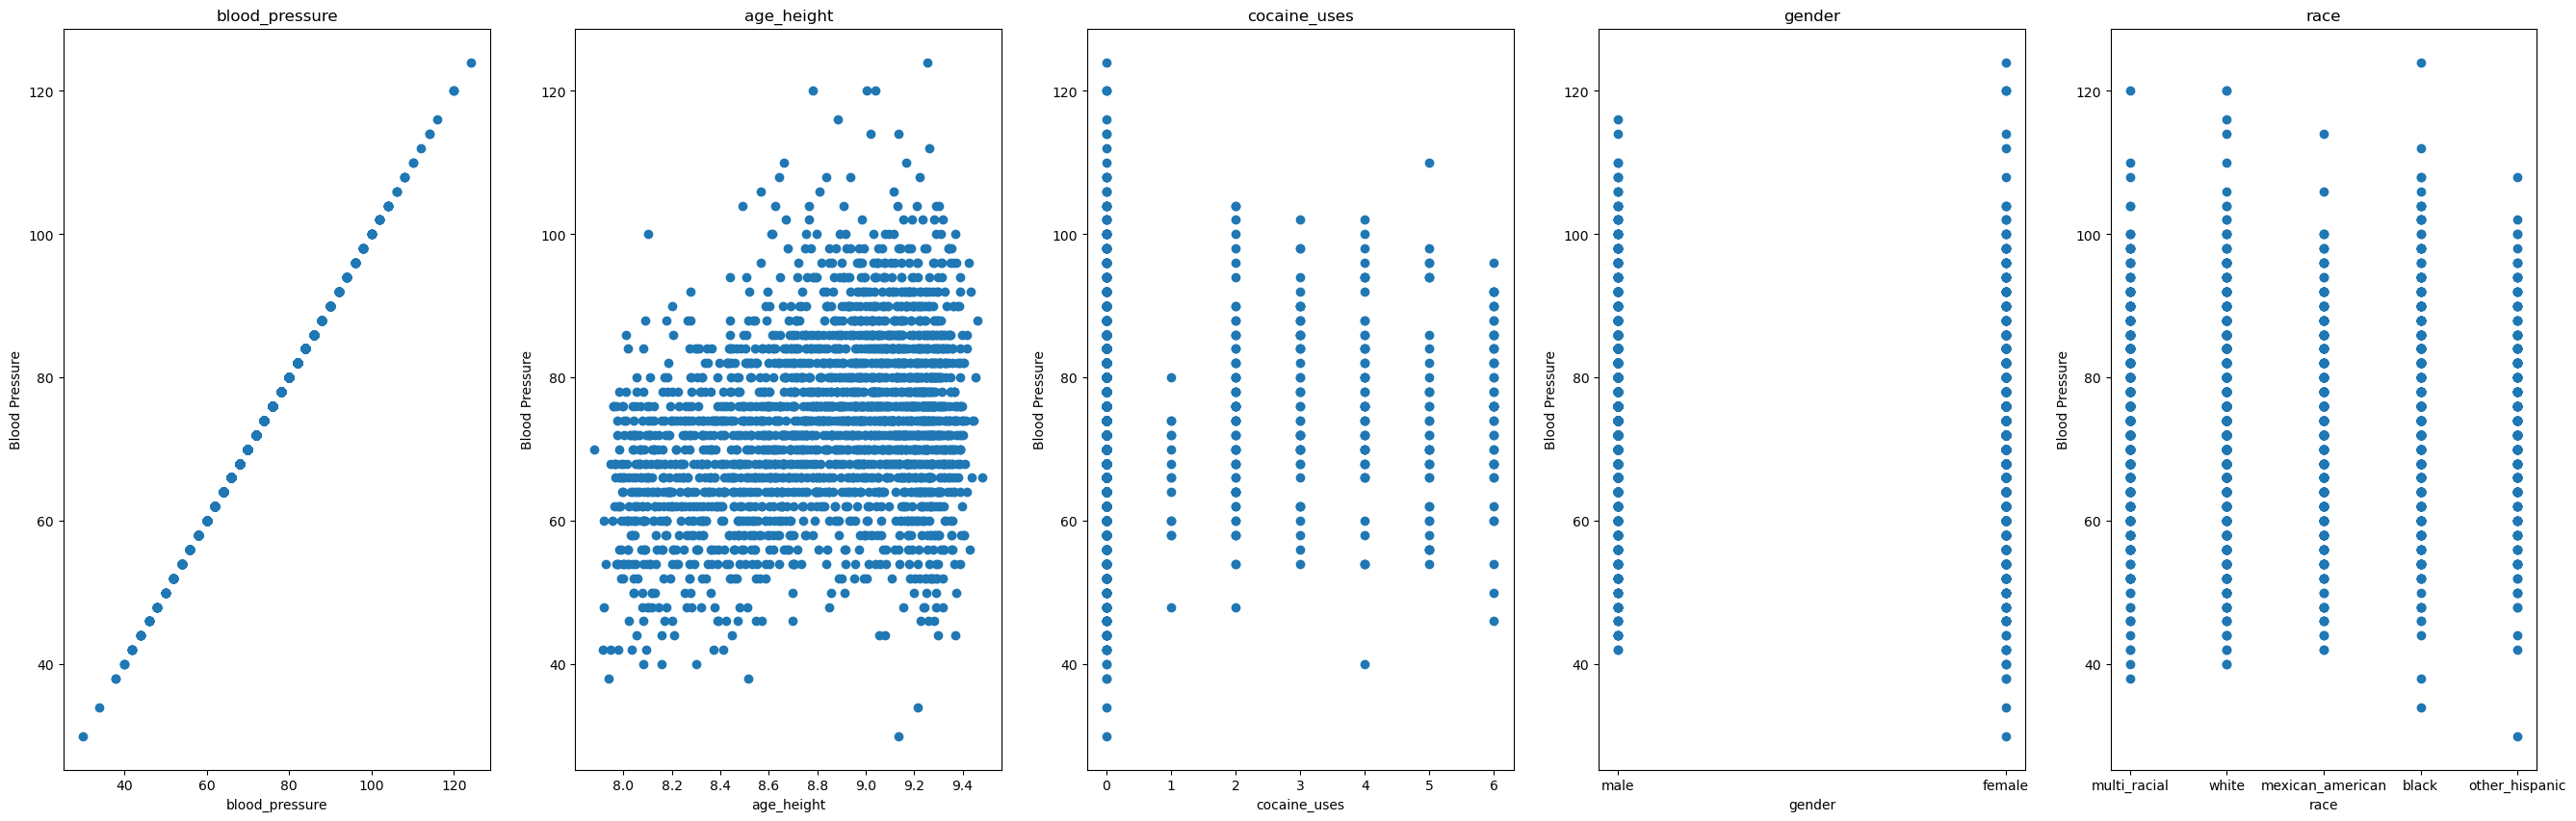

In [27]:
# age same has problem
plt.figure(figsize=(40, 10))


# i: index
for i, col in enumerate(blood2.columns):
    plt.subplot(1, 6, i+1)
    x = blood2[col]
    y = blood2['blood_pressure']
    plt.plot(x, y, 'o')

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Blood Pressure')

In [3]:
m1 = smf.ols('blood_pressure ~ age + height + bmi + alchohol + marijuana_use + min_vig_rec + C(race) + C(gender)', blood).fit()
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m1.summary()

{'LM Statistic': 39.69964891960528, 'LM-Test p-value': 4.026244208587265e-05}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.98e-63
Time:                        18:55:53   Log-Likelihood:                -10105.
No. Observations:                2642   AIC:                         2.023e+04
Df Residuals:                    2630   BIC:                         2.030e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      33.8724      5.515      6.142      0.000      23.058      44.687
C(race)[T.mexican_american]    -0.5844      0.760     -0.769      0.442      -2.074       0.905
C(race)[T.multi_racial]         1.3076      0.703      1.861      0.063      -0.070       2.685
C(race)[T.other_hispanic]      -0.9789      0.870     -1.125      0.261      -2.685       0.728
C(race)[T.white]               -0.8670      0.603     -1.437      0.151      -2.050       0.316
C(gender)[T.male]               1.6230      0.621      2.614      0.009       0.406       2.840
age                             0.1954      0.015     12.751      0.000       0.165       0.225
height                          0.1478      0.033      4.511      0.000       0.084       0.212
bmi                             0.1833      0.030      6.012      0.000       0.124       0.243
alchohol                        0.0072      0.008      0.863      0.388      -0.009       0.023
marijuana_use                   0.0382      0.145      0.263      0.792      -0.246       0.323
min_vig_rec                    -0.0067      0.005     -1.291      0.197      -0.017       0.003
==============================================================================
Omnibus:                       42.335   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.279
Skew:                           0.117   Prob(JB):                     3.33e-16
Kurtosis:                       3.770   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + bmi + cocaine_uses + C(gender) + C(race)', blood).fit()
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 3.157007549530638, 'LM-Test p-value': 0.9241213396841497}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.136
Model:                                OLS   Adj. R-squared:                  0.134
Method:                     Least Squares   F-statistic:                     51.90
Date:                    Mon, 09 Oct 2023   Prob (F-statistic):           1.88e-78
Time:                            12:30:06   Log-Likelihood:                 1199.5
No. Observations:                    2642   AIC:                            -2381.
Df Residuals:                        2633   BIC:                            -2328.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.0754      0.069     44.565      0.000       2.940       3.211
C(gender)[T.male]               0.0376      0.006      6.182      0.000       0.026       0.050
C(race)[T.mexican_american]    -0.0139      0.010     -1.372      0.170      -0.034       0.006
C(race)[T.multi_racial]         0.0128      0.009      1.352      0.177      -0.006       0.031
C(race)[T.other_hispanic]      -0.0198      0.012     -1.684      0.092      -0.043       0.003
C(race)[T.white]               -0.0118      0.008     -1.413      0.158      -0.028       0.005
age_height                      0.1266      0.008     16.275      0.000       0.111       0.142
bmi                             0.0023      0.000      5.563      0.000       0.002       0.003
cocaine_uses                    0.0081      0.002      3.242      0.001       0.003       0.013
==============================================================================
Omnibus:                      181.454   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.499
Skew:                          -0.531   Prob(JB):                     6.81e-65
Kurtosis:                       4.248   Cond. No.                         737.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

{'LM Statistic': 39.69964891960528, 'LM-Test p-value': 4.026244208587265e-05}


Text(0.5, 1.0, 'Moldel 1. Fitted Values vs. Residuals')

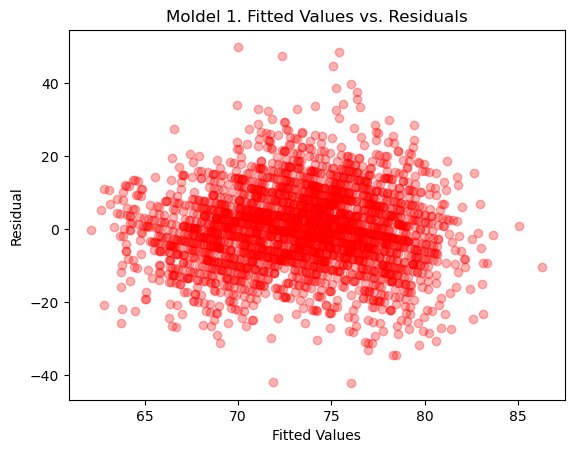

In [37]:
#Heteroscedasticity
#Fitted Values vs. Residuals Plot
p = m1.fittedvalues
res = m1.resid
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
plt.scatter(p,res,  color='red', alpha=0.3)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Moldel 1. Fitted Values vs. Residuals")
#looks bad
#the observations around y=0 is causing a lot of variaty in this data

{'LM Statistic': 5.785211159727263, 'LM-Test p-value': 0.6712770389649643}


Text(0.5, 1.0, 'Model 2. Fitted Values vs. Residuals')

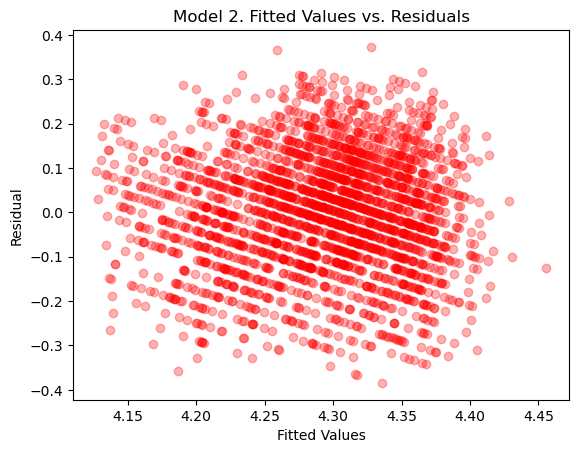

In [58]:
p = m2.fittedvalues
res = m2.resid
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
plt.scatter(p,res,  color='red', alpha=0.3)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Model 2. Fitted Values vs. Residuals")

In [5]:
sm.stats.anova_lm(m2, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),0.905625,1.0,38.221376,7.297579e-10
C(race),0.304852,4.0,3.216528,1.208645e-02
age_height,6.276018,1.0,264.875673,8.037767e-57
bmi,0.733145,1.0,30.941959,2.926388e-08
cocaine_uses,0.249028,1.0,10.510067,1.202073e-03
Residual,62.386836,2633.0,NaN,NaN


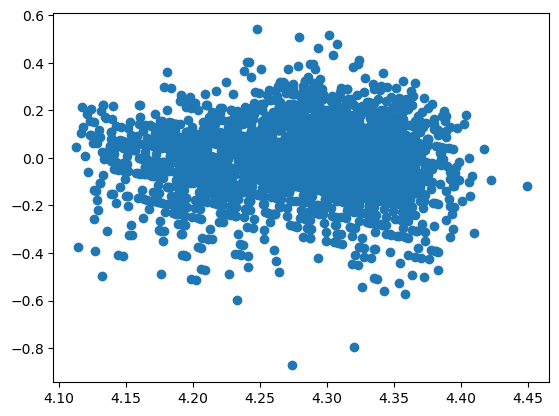

In [11]:
resid = m2.resid
values = m2.fittedvalues
plt.scatter(values, resid)

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m1.resid, m1.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))

{'LM Statistic': 39.69964891960528, 'LM-Test p-value': 4.026244208587265e-05}


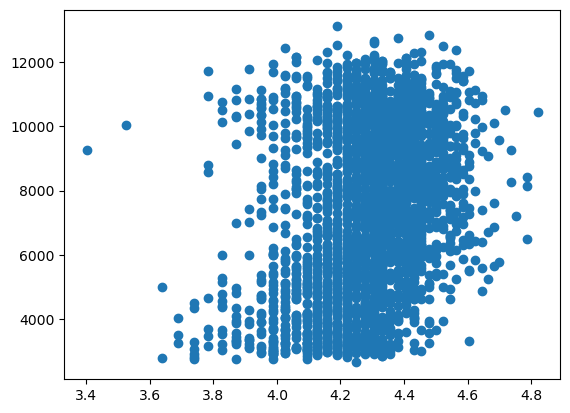

In [8]:
plt.scatter(np.log(blood['blood_pressure']), blood['height']*blood['age'])

In [39]:
# Inluential points
infl = m2.get_influence()

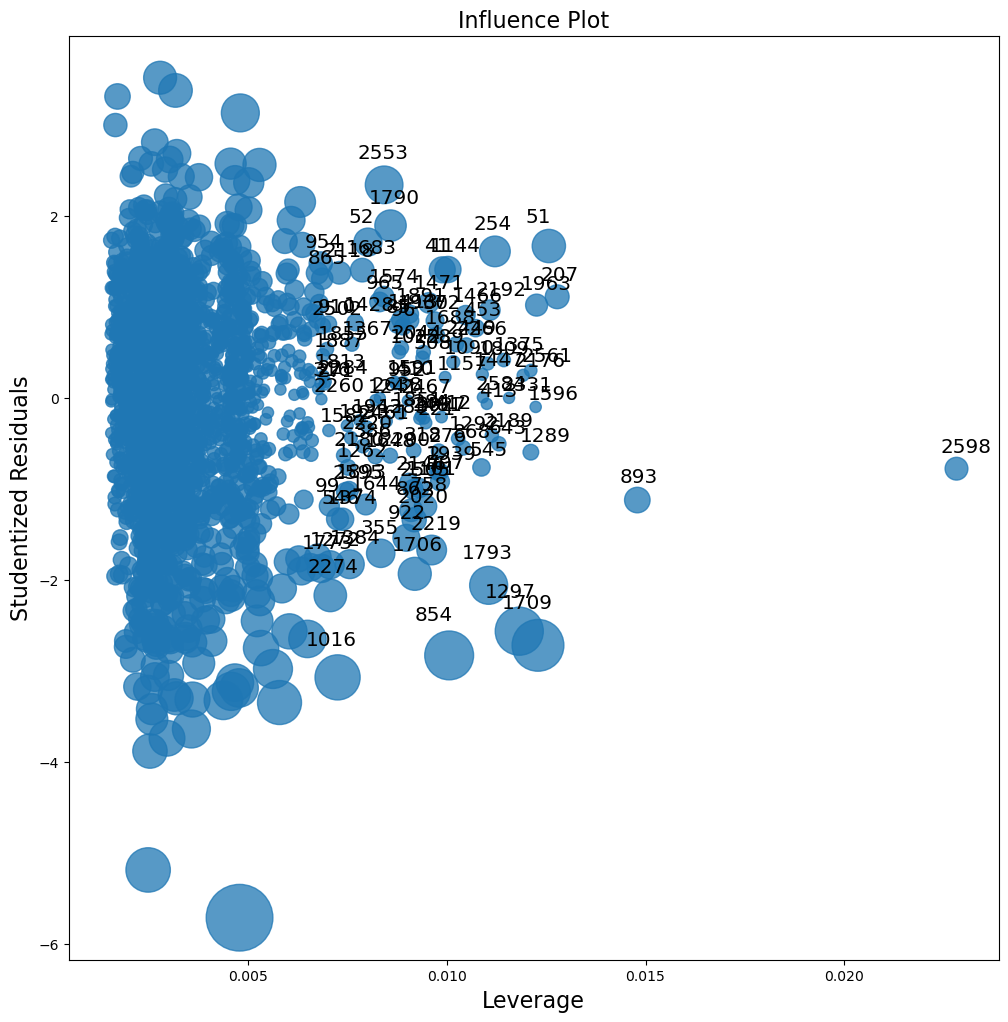

In [45]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(m2,ax=ax, criterion="cooks", alpha = 0) 
#size of points are given by cook's dist value
#the points with big size and out of the (-3,3) should raise a flag

In [47]:
#threshold externally studentized residuals
import scipy
n=2642
p=8
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
#which ones?
print(blood.index[atyp_stud],blood[atyp_stud])

Index([   5,   23,   25,   35,   46,   54,   98,  132,  145,  181,
       ...
       2519, 2534, 2544, 2553, 2557, 2600, 2620, 2639, 2640, 2651],
      dtype='int64', length=142)           SEQN  blood_pressure  weight  height   bmi      salt_type diet  \
5      93726.0            52.0    74.3   154.5  31.1       ordinary   no   
23     93788.0            56.0   112.8   169.5  39.3       ordinary   no   
25     93791.0           100.0   100.6   165.2  36.9       ordinary   no   
35     93832.0            52.0    80.3   172.3  27.0  no_extra_salt   no   
46     93858.0            38.0    36.2   147.3  16.7       ordinary   no   
...        ...             ...     ...     ...   ...            ...  ...   
2600  102786.0            98.0    57.2   155.8  23.6       ordinary  yes   
2620  102836.0           100.0    93.4   165.1  34.3       ordinary   no   
2639  102893.0            52.0    73.8   164.6  27.2       ordinary   no   
2640  102894.0            48.0    71.4   167.1  25.6  no_extr

In [48]:
#Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(blood.index[atyp_cook],blood[atyp_cook])

Index([   5,   25,   35,   41,   46,   51,   52,   54,   98,  101,
       ...
       2494, 2510, 2511, 2519, 2534, 2544, 2553, 2598, 2640, 2651],
      dtype='int64', length=146)           SEQN  blood_pressure  weight  height   bmi      salt_type diet  \
5      93726.0            52.0    74.3   154.5  31.1       ordinary   no   
25     93791.0           100.0   100.6   165.2  36.9       ordinary   no   
35     93832.0            52.0    80.3   172.3  27.0  no_extra_salt   no   
41     93845.0            86.0    67.9   165.3  24.8       ordinary   no   
46     93858.0            38.0    36.2   147.3  16.7       ordinary   no   
...        ...             ...     ...     ...   ...            ...  ...   
2544  102588.0            50.0    89.8   173.2  29.9       ordinary  yes   
2553  102625.0           110.0   103.3   175.0  33.7       ordinary   no   
2598  102778.0            76.0   219.6   161.3  84.4       ordinary   no   
2640  102894.0            48.0    71.4   167.1  25.6  no_extr

In [50]:
intersection = set(blood.index[atyp_cook]) & set(blood.index[atyp_stud])
print(list(intersection))

[2050, 515, 1541, 5, 1032, 2056, 2062, 1045, 536, 25, 539, 35, 1571, 1068, 557, 46, 54, 2103, 1097, 2640, 1111, 2651, 98, 1133, 1646, 1135, 629, 1142, 1147, 1663, 132, 1668, 1669, 671, 1191, 683, 1709, 2222, 2232, 1723, 2237, 192, 200, 202, 1240, 2274, 1251, 743, 755, 1786, 763, 1276, 1789, 768, 1793, 1794, 1799, 2311, 2312, 1297, 2336, 292, 1317, 1837, 304, 1335, 330, 844, 1871, 854, 1881, 1392, 379, 381, 2435, 906, 1418, 1930, 1421, 402, 1433, 2457, 1951, 2465, 421, 432, 946, 436, 2488, 1473, 1475, 452, 458, 973, 1999, 2511, 2519, 472, 2014, 991, 1506, 1508, 2534, 494, 2544, 1013, 1016, 2553]


In [51]:
df_dropped = blood.drop(list(intersection))
df_dropped

,SEQN,blood_pressure,weight,height,bmi,salt_type,diet,protien,carbs,sugar,...,marijuana_use,cocaine_uses,min_vig_work,min_vig_rec,doc_diabetes,risk_diabetes,age_height,food_agregate,drugs,substances
0,93711.0,68.0,62.1,170.6,21.3,ordinary,yes,101.33,339.60,148.21,...,0.0,0.0,0.0,60.0,2.0,2.0,9.164673,4.316719e+11,0.0,0.000000e+00
1,93716.0,72.0,77.7,159.2,30.7,ordinary,no,103.91,442.98,133.24,...,0.0,0.0,0.0,180.0,2.0,2.0,9.181035,1.068806e+11,0.0,0.000000e+00
2,93717.0,62.0,74.4,174.1,24.5,ordinary,no,97.12,345.52,137.01,...,4.0,6.0,0.0,0.0,2.0,2.0,8.250672,4.841306e+10,24.0,0.000000e+00
3,93721.0,68.0,85.1,154.0,35.9,no_extra_salt,no,79.98,226.61,105.06,...,0.0,0.0,0.0,0.0,2.0,2.0,9.131297,2.036987e+10,0.0,0.000000e+00
4,93723.0,72.0,64.9,170.1,22.4,ordinary,no,41.62,269.60,147.49,...,0.0,0.0,60.0,60.0,3.0,1.0,9.295270,0.000000e+00,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,102920.0,94.0,73.0,159.6,28.7,ordinary,no,60.51,277.11,83.04,...,0.0,0.0,0.0,0.0,2.0,2.0,9.199805,2.103734e+10,0.0,6.609583e+08
2649,102929.0,82.0,116.7,183.0,34.8,ordinary,no,73.89,177.01,25.82,...,0.0,0.0,0.0,0.0,2.0,2.0,9.303831,1.229300e+10,0.0,0.000000e+00
2650,102933.0,62.0,50.8,167.9,18.0,ordinary,no,70.14,393.95,157.55,...,0.0,0.0,0.0,45.0,2.0,2.0,8.301422,0.000000e+00,0.0,0.000000e+00
2652,102949.0,72.0,76.9,180.1,23.7,ordinary,no,263.12,368.84,183.58,...,3.0,3.0,90.0,0.0,2.0,2.0,8.690020,2.843480e+11,9.0,9.232698e+08


In [53]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + bmi + cocaine_uses + C(gender) + C(race)', df_dropped).fit()
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 5.785211159727263, 'LM-Test p-value': 0.6712770389649643}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.173
Model:                                OLS   Adj. R-squared:                  0.170
Method:                     Least Squares   F-statistic:                     65.99
Date:                    Mon, 09 Oct 2023   Prob (F-statistic):           1.41e-98
Time:                            13:46:01   Log-Likelihood:                 1567.7
No. Observations:                    2534   AIC:                            -3117.
Df Residuals:                        2525   BIC:                            -3065.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1146      0.060     51.677      0.000       2.996       3.233
C(gender)[T.male]               0.0394      0.005      7.477      0.000       0.029       0.050
C(race)[T.mexican_american]    -0.0089      0.009     -1.013      0.311      -0.026       0.008
C(race)[T.multi_racial]         0.0160      0.008      1.950      0.051   -9.19e-05       0.032
C(race)[T.other_hispanic]      -0.0177      0.010     -1.737      0.082      -0.038       0.002
C(race)[T.white]               -0.0119      0.007     -1.642      0.101      -0.026       0.002
age_height                      0.1230      0.007     18.110      0.000       0.110       0.136
bmi                             0.0024      0.000      6.366      0.000       0.002       0.003
cocaine_uses                    0.0081      0.002      3.734      0.000       0.004       0.012
==============================================================================
Omnibus:                       22.719   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.010
Skew:                          -0.164   Prob(JB):                     4.52e-05
Kurtosis:                       2.714   Cond. No.                         742.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
from scipy.stats import kstest
kstest(m2.resid,'norm')

KstestResult(statistic=0.38064888800080043, pvalue=0.0, statistic_location=0.28724330295087874, statistic_sign=1)

(array([ 23.,  99., 196., 343., 525., 576., 436., 241.,  83.,  12.]),
 array([-0.38444376, -0.30872516, -0.23300656, -0.15728797, -0.08156937,
        -0.00585077,  0.06986783,  0.14558642,  0.22130502,  0.29702362,
         0.37274221]),
 <BarContainer object of 10 artists>)

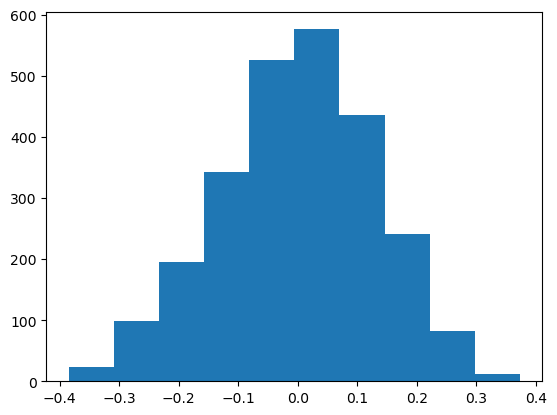

In [56]:
plt.hist(m2.resid)

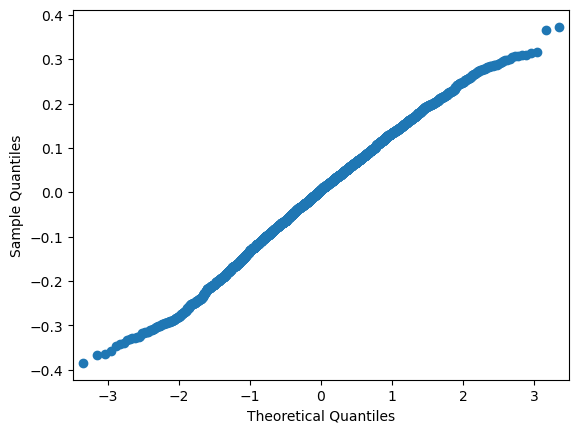

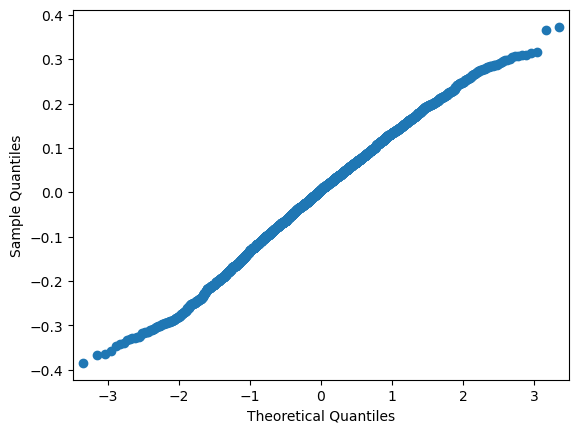

In [57]:
sm.qqplot(m2.resid)